### Display of student performance file and creation of dummy variables

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Student Performance new.csv')
df.head().style.background_gradient(axis=0)

,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,0,group B,bachelor's degree,standard,none,0.720000,0.720000,0.740000,F
1,1,group C,some college,standard,completed,0.690000,0.900000,0.880000,F
2,2,group B,master's degree,standard,none,0.900000,0.950000,0.930000,F
3,3,group A,associate's degree,free/reduced,none,0.470000,0.570000,0.440000,M
4,4,group C,some college,standard,none,0.760000,0.780000,0.750000,M


In [3]:
df.columns

Index(['Unnamed: 0', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                     0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
sex                            0
dtype: int64

In [5]:
new_df = pd.get_dummies(df, columns = ['parental level of education','race/ethnicity','lunch','test preparation course', 'sex'] ,drop_first= True,prefix = 'Dumy',prefix_sep ="*" )
new_df.head().style.background_gradient(axis=0)

,Unnamed: 0,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,Dumy*M
0,0,0.720000,0.720000,0.740000,1,0,0,0,0,1,0,0,0,1,1,0
1,1,0.690000,0.900000,0.880000,0,0,0,1,0,0,1,0,0,1,0,0
2,2,0.900000,0.950000,0.930000,0,0,1,0,0,1,0,0,0,1,1,0
3,3,0.470000,0.570000,0.440000,0,0,0,0,0,0,0,0,0,0,1,1
4,4,0.760000,0.780000,0.750000,0,0,0,1,0,0,1,0,0,1,1,1


### Modification of dataframe

In [6]:
new_df = new_df.drop(['Unnamed: 0'], axis=1)

In [7]:
new_df

,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,Dumy*M
0,0.72,0.72,0.74,1,0,0,0,0,1,0,0,0,1,1,0
1,0.69,0.90,0.88,0,0,0,1,0,0,1,0,0,1,0,0
2,0.90,0.95,0.93,0,0,1,0,0,1,0,0,0,1,1,0
3,0.47,0.57,0.44,0,0,0,0,0,0,0,0,0,0,1,1
4,0.76,0.78,0.75,0,0,0,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.88,0.99,0.95,0,0,1,0,0,0,0,0,1,1,0,0
996,0.62,0.55,0.55,0,1,0,0,0,0,1,0,0,0,1,1
997,0.59,0.71,0.65,0,1,0,0,0,0,1,0,0,0,0,0
998,0.68,0.78,0.77,0,0,0,1,0,0,0,1,0,1,0,0


### Dendogram of dataframe and scatter plot of math and reading scores by class

In [8]:
from sklearn.preprocessing import normalize

In [9]:
data_scaled = normalize(new_df)
data_scaled = pd.DataFrame(data_scaled, columns=new_df.columns)
data_scaled.head()

,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,Dumy*M
0,0.304680,0.304680,0.313144,0.423167,0.0,0.000000,0.000000,0.0,0.423167,0.000000,0.0,0.0,0.423167,0.423167,0.000000
1,0.306727,0.400079,0.391188,0.000000,0.0,0.000000,0.444532,0.0,0.000000,0.444532,0.0,0.0,0.444532,0.000000,0.000000
2,0.350926,0.370422,0.362623,0.000000,0.0,0.389918,0.000000,0.0,0.389918,0.000000,0.0,0.0,0.389918,0.389918,0.000000
3,0.283968,0.344387,0.265843,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.604188,0.604188
4,0.292557,0.300256,0.288707,0.000000,0.0,0.000000,0.384943,0.0,0.000000,0.384943,0.0,0.0,0.384943,0.384943,0.384943


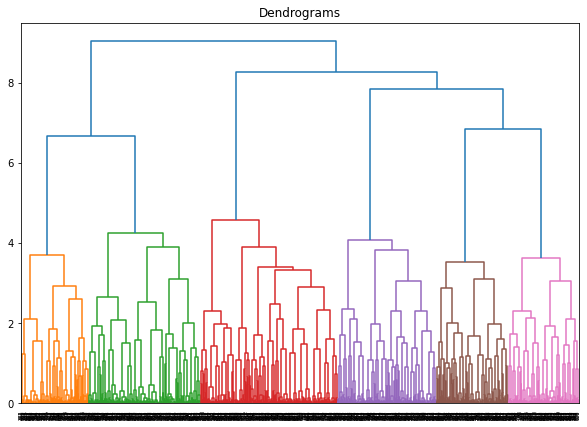

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')  
cluster.fit_predict(data_scaled)

array([3, 0, 3, 4, 0, 3, 3, 3, 4, 3, 0, 4, 3, 1, 4, 0, 0, 2, 0, 0, 4, 3,
       4, 0, 5, 0, 3, 5, 0, 4, 4, 3, 1, 4, 1, 1, 4, 2, 4, 3, 0, 0, 3, 3,
       1, 3, 0, 0, 4, 0, 1, 1, 0, 4, 0, 0, 1, 4, 4, 2, 5, 2, 4, 0, 2, 2,
       2, 0, 3, 0, 4, 4, 4, 0, 0, 3, 2, 5, 2, 1, 3, 3, 1, 1, 4, 0, 0, 4,
       0, 2, 5, 0, 0, 0, 3, 0, 2, 1, 4, 5, 3, 5, 4, 3, 0, 0, 4, 1, 3, 2,
       4, 0, 4, 4, 5, 0, 3, 5, 2, 0, 5, 3, 0, 4, 1, 3, 2, 4, 4, 5, 4, 0,
       1, 0, 5, 5, 2, 1, 0, 4, 2, 0, 1, 0, 4, 0, 2, 0, 5, 1, 2, 5, 3, 5,
       2, 0, 1, 3, 3, 4, 3, 1, 3, 0, 1, 5, 0, 3, 3, 0, 1, 2, 4, 0, 5, 0,
       3, 0, 3, 2, 0, 0, 1, 4, 0, 0, 1, 2, 2, 5, 1, 4, 2, 4, 0, 4, 0, 0,
       3, 3, 0, 4, 0, 3, 0, 2, 5, 1, 3, 3, 2, 0, 0, 0, 1, 2, 1, 0, 3, 2,
       4, 3, 2, 2, 3, 1, 0, 4, 2, 0, 4, 0, 3, 2, 5, 4, 5, 2, 3, 0, 4, 5,
       4, 1, 2, 0, 1, 3, 3, 0, 2, 4, 2, 4, 4, 1, 0, 0, 3, 0, 0, 0, 2, 1,
       4, 2, 5, 4, 4, 1, 5, 0, 4, 4, 3, 5, 0, 1, 2, 3, 4, 4, 4, 4, 2, 3,
       1, 2, 3, 1, 0, 2, 0, 5, 4, 3, 2, 1, 0, 4, 1,

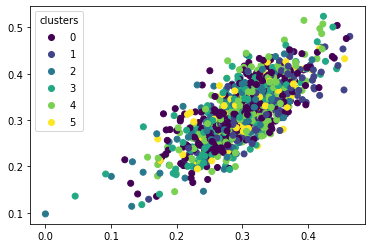

In [12]:
fig, ax = plt.subplots()
sc = ax.scatter(data_scaled['math percentage'], data_scaled['reading score percentage'], c=cluster.labels_)
ax.legend(*sc.legend_elements(), title='clusters')

In [13]:
label_count = pd.Series(cluster.labels_).value_counts()
label_count

0    297
4    203
3    155
2    127
1    125
5     93
dtype: int64

### KMeans clustering of students by gender

In [58]:
X = new_df.iloc[:, :2].values

In [59]:
from sklearn.cluster import KMeans

In [60]:
clf =  KMeans(n_clusters=2)
y_predicted = clf.fit_predict(X)

In [61]:
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [62]:
new_df2 = new_df
new_df2 = new_df2.drop(['Dumy*M'], axis=1)
new_df2['gender'] = y_predicted
new_df2.head()

,math percentage,reading score percentage,writing score percentage,Dumy*bachelor's degree,Dumy*high school,Dumy*master's degree,Dumy*some college,Dumy*some high school,Dumy*group B,Dumy*group C,Dumy*group D,Dumy*group E,Dumy*standard,Dumy*none,gender
0,0.72,0.72,0.74,1,0,0,0,0,1,0,0,0,1,1,0
1,0.69,0.90,0.88,0,0,0,1,0,0,1,0,0,1,0,0
2,0.90,0.95,0.93,0,0,1,0,0,1,0,0,0,1,1,0
3,0.47,0.57,0.44,0,0,0,0,0,0,0,0,0,0,1,1
4,0.76,0.78,0.75,0,0,0,1,0,0,1,0,0,1,1,0


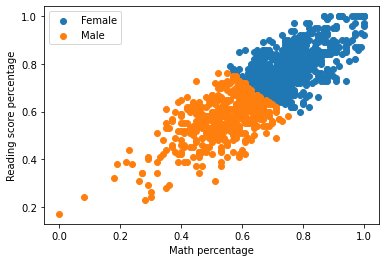

In [63]:
df1 = new_df2[new_df2.gender == 0]
df2 = new_df2[new_df2.gender == 1]
plt.scatter(df1['math percentage'], df1['reading score percentage'], label = 'Female')
plt.scatter(df2['math percentage'], df2['reading score percentage'], label = 'Male')
plt.xlabel('Math percentage')
plt.ylabel('Reading score percentage')
plt.legend()